In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [2]:
df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [3]:
df.shape

(8000, 30)

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [5]:
df['class'].value_counts()

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64

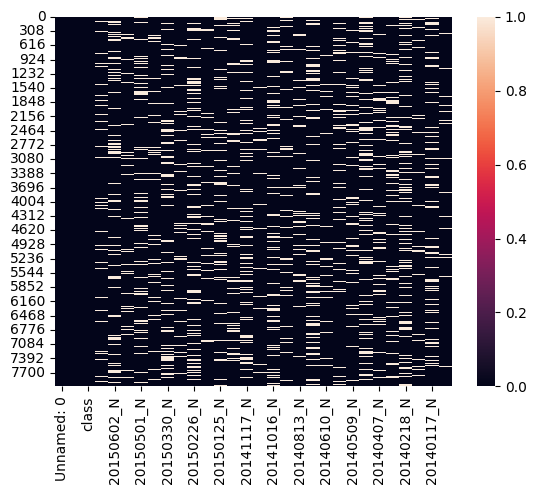

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [8]:
# Step 1: Drop 'Unnamed: 0' (index column)
df.drop(columns=["Unnamed: 0"], inplace=True)

# Step 2: Identify NDVI columns and sort them by date
ndvi_cols = sorted([col for col in df.columns if col.endswith("_N")])
non_ndvi_cols = ['ID', 'class']
df = df[non_ndvi_cols + ndvi_cols]

# Step 3: Interpolate missing NDVI values across each row
df[ndvi_cols] = df[ndvi_cols].interpolate(axis=1, limit_direction='both')

# Step 4: Fill any remaining missing values with column-wise mean (fallback)
df[ndvi_cols] = df[ndvi_cols].fillna(df[ndvi_cols].mode())

# Step 5: Denoising with rolling mean (window = 3)
df[ndvi_cols] = df[ndvi_cols].rolling(window=3, axis=1, min_periods=1).mean()

# Step 6: Feature engineering – NDVI statistics per sample
df["NDVI_mean"] = df[ndvi_cols].mean(axis=1)
df["NDVI_std"] = df[ndvi_cols].std(axis=1)
df["NDVI_min"] = df[ndvi_cols].min(axis=1)
df["NDVI_max"] = df[ndvi_cols].max(axis=1)

/tmp/ipykernel_13/651186502.py:16: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df[ndvi_cols] = df[ndvi_cols].rolling(window=3, axis=1, min_periods=1).mean()


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

df.drop(columns=['ID'], inplace=True)
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=2, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)


#model = LogisticRegression(max_iter=1000)
#model.fit(X_train_scaled, y_train)
#y_pred = model.predict(X_test)


In [10]:
model.score(X_test_scaled,y_test)

0.875

In [11]:
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))

              precision    recall  f1-score   support

        farm       0.00      0.00      0.00         1
      forest       0.86      1.00      0.92         6
       grass       0.00      0.00      0.00         0
  impervious       1.00      1.00      1.00         1
     orchard       0.00      0.00      0.00         0
       water       0.00      0.00      0.00         0

   micro avg       0.88      0.88      0.88         8
   macro avg       0.31      0.33      0.32         8
weighted avg       0.77      0.88      0.82         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

In [12]:
df_test = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
df_test.shape

(2845, 29)

In [13]:


# Step 1: Drop 'Unnamed: 0' if it exists
if "Unnamed: 0" in df_test.columns:
    df_test.drop(columns=["Unnamed: 0"], inplace=True)

# Step 2: Identify and sort NDVI columns
ndvi_cols = sorted([col for col in df_test.columns if col.endswith("_N")])
non_ndvi_cols = ['ID']
df_test = df_test[non_ndvi_cols + ndvi_cols]

# Step 3: Interpolate missing NDVI values across each row
df_test[ndvi_cols] = df_test[ndvi_cols].interpolate(axis=1, limit_direction='both')

# Step 4: Fill remaining NaNs with column-wise mean
df_test[ndvi_cols] = df_test[ndvi_cols].fillna(df_test[ndvi_cols].mode())

# Step 5: Denoise using rolling mean (window = 3)
df_test[ndvi_cols] = df_test[ndvi_cols].rolling(window=3, axis=1, min_periods=1).mean()

# Step 6: Feature engineering – NDVI stats
df_test["NDVI_mean"] = df_test[ndvi_cols].mean(axis=1)
df_test["NDVI_std"] = df_test[ndvi_cols].std(axis=1)
df_test["NDVI_min"] = df_test[ndvi_cols].min(axis=1)
df_test["NDVI_max"] = df_test[ndvi_cols].max(axis=1)



/tmp/ipykernel_13/2007542139.py:17: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_test[ndvi_cols] = df_test[ndvi_cols].rolling(window=3, axis=1, min_periods=1).mean()


In [14]:
# Save the ID column
ID = df_test['ID']

# Drop the ID column before scaling
X_testf = df_test.drop(columns=['ID'])

# Scale using the same scaler that was fit on training data
X_testf_scaled = scaler.transform(X_testf)

# Predict using the trained model
y_testf_scaled = model.predict(X_testf_scaled)

# Create final output DataFrame
result_df = pd.DataFrame({
    'ID': ID,
    'class': y_testf_scaled
})




In [15]:
y_decoded = label_encoder.inverse_transform(y_testf_scaled)
y_decoded

array(['farm', 'forest', 'forest', ..., 'water', 'water', 'water'],
      dtype=object)

In [16]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})
result

,ID,class
0,1,farm
1,2,forest
2,3,forest
3,4,forest
4,5,forest
...,...,...
2840,2841,water
2841,2842,water
2842,2843,water
2843,2844,water


In [17]:
result.to_csv("submission.csv", index=False)